In [52]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [35]:
users=pd.read_csv('users_cleaned.csv').set_index('user_id')

In [15]:
users

,username,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
user_id,,,,,,,,,,,,,,,,
2255153,karthiga,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
37326,Damonashu,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
228342,bskai,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
327311,terune_uzumaki,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
5015094,Bas_G,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847
3129315,HimeAria,2,87,2,0,28,19.963194,Female,Poland,1996-09-26 00:00:00,NaN,2013-09-08 00:00:00,2018-01-14 13:05:42,8.23,0.0,1314
326733,Skallington,0,3,0,0,0,1.234722,Male,Norberg Sweden,1991-03-15 00:00:00,NaN,2010-05-09 00:00:00,2010-05-12 06:29:00,10.00,7.0,73
61677,Slimak,79,224,0,3,84,124.731944,Male,Poland,1988-02-21 00:00:00,NaN,2008-05-18 00:00:00,2018-05-01 12:05:21,7.77,2.0,7447
5927342,Elysiun,7,4,0,0,4,2.057639,Male,Nebraska,1984-11-16 00:00:00,NaN,2016-12-25 00:00:00,2017-03-11 21:37:00,7.40,0.0,121


In [36]:
users['age']=users['birth_date'].map(lambda x: 2018-int(x.split()[0][:4]))

In [37]:
users['location']=users['location'].map(lambda x:str(x).replace('The Netherlands','Netherlands'))

In [38]:
users['location']=users['location'].map(lambda x: x.split(',')[-1].replace(' ',''))

In [39]:
statelist=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming",'CA']
for i in range(len(statelist)):
    
    users['location']=users['location'].map(lambda x: x.replace(statelist[i],'USA'))

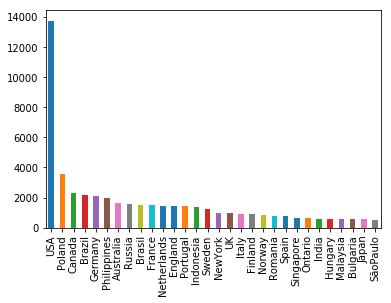

In [40]:
users['location'].value_counts()[:30].plot(kind='bar')

(array([3.2741e+04, 3.8790e+03, 5.6200e+02, 9.9000e+01, 2.5000e+01,
        1.3000e+01, 6.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([5.00694444e-01, 9.57160845e+01, 1.90931475e+02, 2.86146865e+02,
        3.81362255e+02, 4.76577645e+02, 5.71793035e+02, 6.67008425e+02,
        7.62223815e+02, 8.57439205e+02, 9.52654595e+02]),
 <a list of 10 Patch objects>)

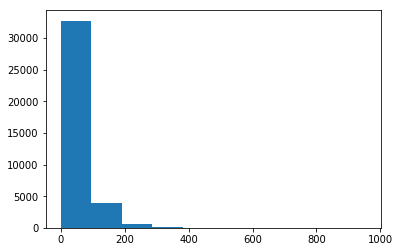

In [56]:
mask_fe=users['gender']=='Female'
mask_male=users['gender']=='Male'
hist(users['user_days_spent_watching'][mask_fe])


(array([5.3278e+04, 1.4271e+04, 2.5420e+03, 5.6200e+02, 1.4400e+02,
        4.7000e+01, 1.8000e+01, 9.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([5.01388889e-01, 9.50195833e+01, 1.89537778e+02, 2.84055972e+02,
        3.78574167e+02, 4.73092361e+02, 5.67610556e+02, 6.62128750e+02,
        7.56646944e+02, 8.51165139e+02, 9.45683333e+02]),
 <a list of 10 Patch objects>)

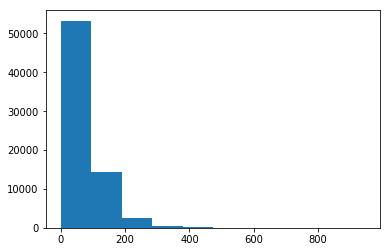

In [60]:
hist(users['user_days_spent_watching'][mask_male])


(array([1.3800e+03, 2.5000e+01, 1.9000e+01, 4.5000e+01, 3.0600e+02,
        1.4330e+03, 8.1130e+03, 2.9637e+04, 2.3124e+04, 6.7980e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

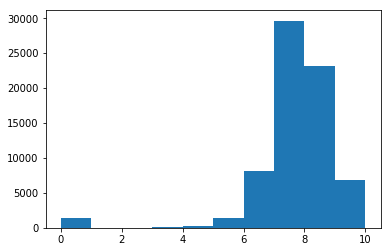

In [61]:
hist(users['stats_mean_score'][mask_male])

(array([9.0100e+02, 1.5000e+01, 1.4000e+01, 1.0000e+01, 6.1000e+01,
        4.0400e+02, 3.3800e+03, 1.3745e+04, 1.3130e+04, 5.6700e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

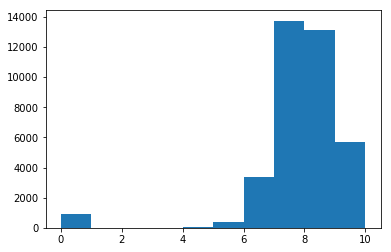

In [62]:
hist(users['stats_mean_score'][mask_fe])

(array([  106.,  3245., 20331., 37010., 31402., 11919.,  3294.,   926.,
          308.,   170.]),
 array([10. , 13.9, 17.8, 21.7, 25.6, 29.5, 33.4, 37.3, 41.2, 45.1, 49. ]),
 <a list of 10 Patch objects>)

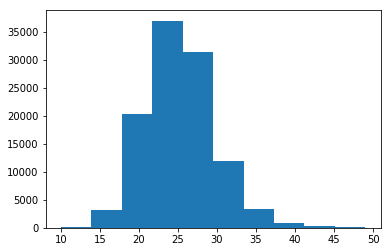

In [63]:
hist(users['age'])

(array([8.9225e+04, 1.6165e+04, 2.5610e+03, 5.3900e+02, 1.2700e+02,
        4.7000e+01, 2.1000e+01, 1.6000e+01, 5.0000e+00, 5.0000e+00]),
 array([7.0000e+00, 6.2410e+03, 1.2475e+04, 1.8709e+04, 2.4943e+04,
        3.1177e+04, 3.7411e+04, 4.3645e+04, 4.9879e+04, 5.6113e+04,
        6.2347e+04]),
 <a list of 10 Patch objects>)

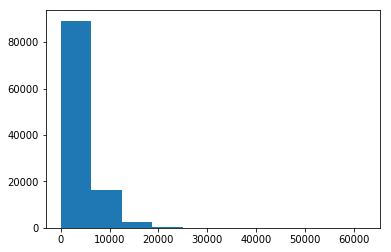

In [64]:
hist(users['stats_episodes'])